In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv("/content/odp_idb_2001_2022_ddg_compliant.csv")

In [24]:
df.head(20)

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
0,Anaplasmosis,Alameda,2001,Female,0.0,746596,-,0.0,0.494
1,Anaplasmosis,Alameda,2001,Male,0.0,718968,-,0.0,0.513
2,Anaplasmosis,Alameda,2001,Total,0.0,1465564,-,0.0,0.252
3,Anaplasmosis,Alameda,2002,Female,0.0,747987,-,0.0,0.493
4,Anaplasmosis,Alameda,2002,Male,0.0,720481,-,0.0,0.512
5,Anaplasmosis,Alameda,2002,Total,0.0,1468468,-,0.0,0.251
6,Anaplasmosis,Alameda,2003,Female,0.0,747441,-,0.0,0.494
7,Anaplasmosis,Alameda,2003,Male,0.0,719746,-,0.0,0.513
8,Anaplasmosis,Alameda,2003,Total,0.0,1467187,-,0.0,0.251
9,Anaplasmosis,Alameda,2004,Female,0.0,746723,-,0.0,0.494


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189921 entries, 0 to 189920
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Disease       189921 non-null  object 
 1   County        189921 non-null  object 
 2   Year          189921 non-null  int64  
 3   Sex           189921 non-null  object 
 4   Cases         185167 non-null  float64
 5   Population    189921 non-null  int64  
 6   Rate          189921 non-null  object 
 7   Lower_95__CI  184650 non-null  float64
 8   Upper_95__CI  184650 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 13.0+ MB


In [26]:
filt = df['Rate'] == 'SC'
df.drop(index=df[filt].index, inplace=True)
df['Rate'].value_counts()

,count
Rate,
-,146904
0.020*,186
0.005*,165
0.010*,134
0.063*,132
...,...
6.519*,1
7.588*,1
6.574*,1


In [27]:
df['Rate'] = df['Rate'].str.replace('*', '', regex=False)
df['Rate'] = df['Rate'].str.replace('-', '0', regex=False)
df['Rate'] = df['Rate'].astype('float64')
df.head(50)

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
0,Anaplasmosis,Alameda,2001,Female,0.0,746596,0.000,0.000,0.494
1,Anaplasmosis,Alameda,2001,Male,0.0,718968,0.000,0.000,0.513
2,Anaplasmosis,Alameda,2001,Total,0.0,1465564,0.000,0.000,0.252
3,Anaplasmosis,Alameda,2002,Female,0.0,747987,0.000,0.000,0.493
4,Anaplasmosis,Alameda,2002,Male,0.0,720481,0.000,0.000,0.512
5,Anaplasmosis,Alameda,2002,Total,0.0,1468468,0.000,0.000,0.251
6,Anaplasmosis,Alameda,2003,Female,0.0,747441,0.000,0.000,0.494
7,Anaplasmosis,Alameda,2003,Male,0.0,719746,0.000,0.000,0.513
8,Anaplasmosis,Alameda,2003,Total,0.0,1467187,0.000,0.000,0.251
9,Anaplasmosis,Alameda,2004,Female,0.0,746723,0.000,0.000,0.494


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185181 entries, 0 to 189920
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Disease       185181 non-null  object 
 1   County        185181 non-null  object 
 2   Year          185181 non-null  int64  
 3   Sex           185181 non-null  object 
 4   Cases         185167 non-null  float64
 5   Population    185181 non-null  int64  
 6   Rate          185181 non-null  float64
 7   Lower_95__CI  184650 non-null  float64
 8   Upper_95__CI  184650 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 14.1+ MB


In [29]:
df.groupby('Disease')['Rate'].mean().sort_values(ascending = False).head(10)

,Rate
Disease,
Campylobacteriosis,19.150163
Coccidioidomycosis,12.000524
Salmonellosis,11.467313
Giardiasis,5.665743
Shigellosis,3.452487
Shiga toxin-producing E. coli (STEC) without HUS,2.265992
Cryptosporidiosis,1.167573
Lyme Disease,0.503697
Legionellosis,0.400315


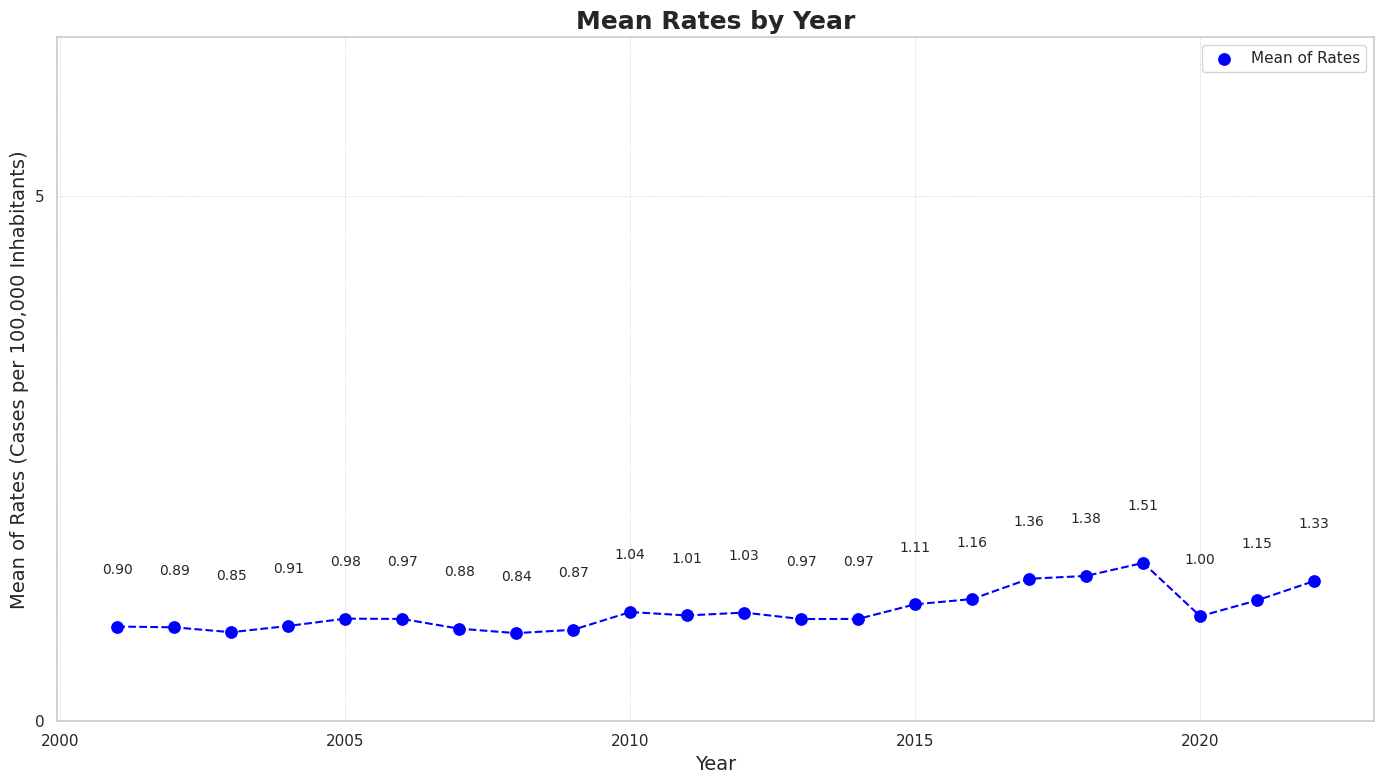

In [30]:
# Group by 'Year' and calculate the mean 'Rate'
df_Rate_Year = df.groupby('Year')['Rate'].mean().reset_index()

# Set the style
sns.set(style="whitegrid")

# Create a scatter plot with a trend line
plt.figure(figsize=(14, 8), dpi=100)  # Increase figure size and resolution for clarity
sns.scatterplot(data=df_Rate_Year, x='Year', y='Rate', s=100, color='blue', marker='o', label='Mean of Rates')
sns.lineplot(data=df_Rate_Year, x='Year', y='Rate', color='blue', linestyle='--')

# Add detailed y-axis ticks
y_ticks = np.arange(0, df_Rate_Year['Rate'].max() + 5, 5)  # Adjust step size for more granularity
plt.yticks(y_ticks)

# Set the y-axis to start from 0 with a dynamic max value
plt.ylim(0, df_Rate_Year['Rate'].max() + 5)

# Annotate scatter points with their values
for i, row in df_Rate_Year.iterrows():
    plt.text(row['Year'], row['Rate'] + 0.5, f"{row['Rate']:.2f}", ha='center', fontsize=10)

# Add titles and labels
plt.title('Mean Rates by Year', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean of Rates (Cases per 100,000 Inhabitants)', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [31]:
# Looking at the differences between 2019 and 2020
# Filter the DataFrame for the year 2019
df_2019 = df[df['Year'] == 2019]

# Group by 'Disease' and calculate the mean 'Rate' for 2019
diseases_2019 = df_2019.groupby('Disease')['Rate'].mean().reset_index()

# Sort the diseases by mean rate in descending order to find the most prevalent ones
most_prevalent_2019 = diseases_2019.sort_values(by='Rate', ascending=False)

# Display the top 10 most prevalent diseases in 2019
print(most_prevalent_2019.head(10))

                                             Disease       Rate
7                                 Campylobacteriosis  27.836106
11                                Coccidioidomycosis  23.178837
37                                     Salmonellosis  13.159455
20                                        Giardiasis   7.059220
40  Shiga toxin-producing E. coli (STEC) without HUS   5.943503
41                                       Shigellosis   5.590887
13                                 Cryptosporidiosis   2.423881
24                                     Legionellosis   0.850055
50                                       Yersiniosis   0.731764
28                                      Lyme Disease   0.669258


In [32]:
# Filter the DataFrame for the year 2020
df_2020 = df[df['Year'] == 2020]

# Group by 'Disease' and calculate the mean 'Rate' for 2020
diseases_2020 = df_2020.groupby('Disease')['Rate'].mean().reset_index()

# Sort the diseases by mean rate in descending order to find the most prevalent ones
most_prevalent_2020 = diseases_2020.sort_values(by='Rate', ascending=False)

# Display the top 10 most prevalent diseases in 2020
print(most_prevalent_2020.head(10))

                                             Disease       Rate
7                                 Campylobacteriosis  19.025525
11                                Coccidioidomycosis  17.606524
37                                     Salmonellosis  10.007783
20                                        Giardiasis   4.087401
40  Shiga toxin-producing E. coli (STEC) without HUS   3.060445
41                                       Shigellosis   2.488630
13                                 Cryptosporidiosis   1.091406
24                                     Legionellosis   0.610751
50                                       Yersiniosis   0.594048
47                    Vibrio Infection (non-Cholera)   0.525217


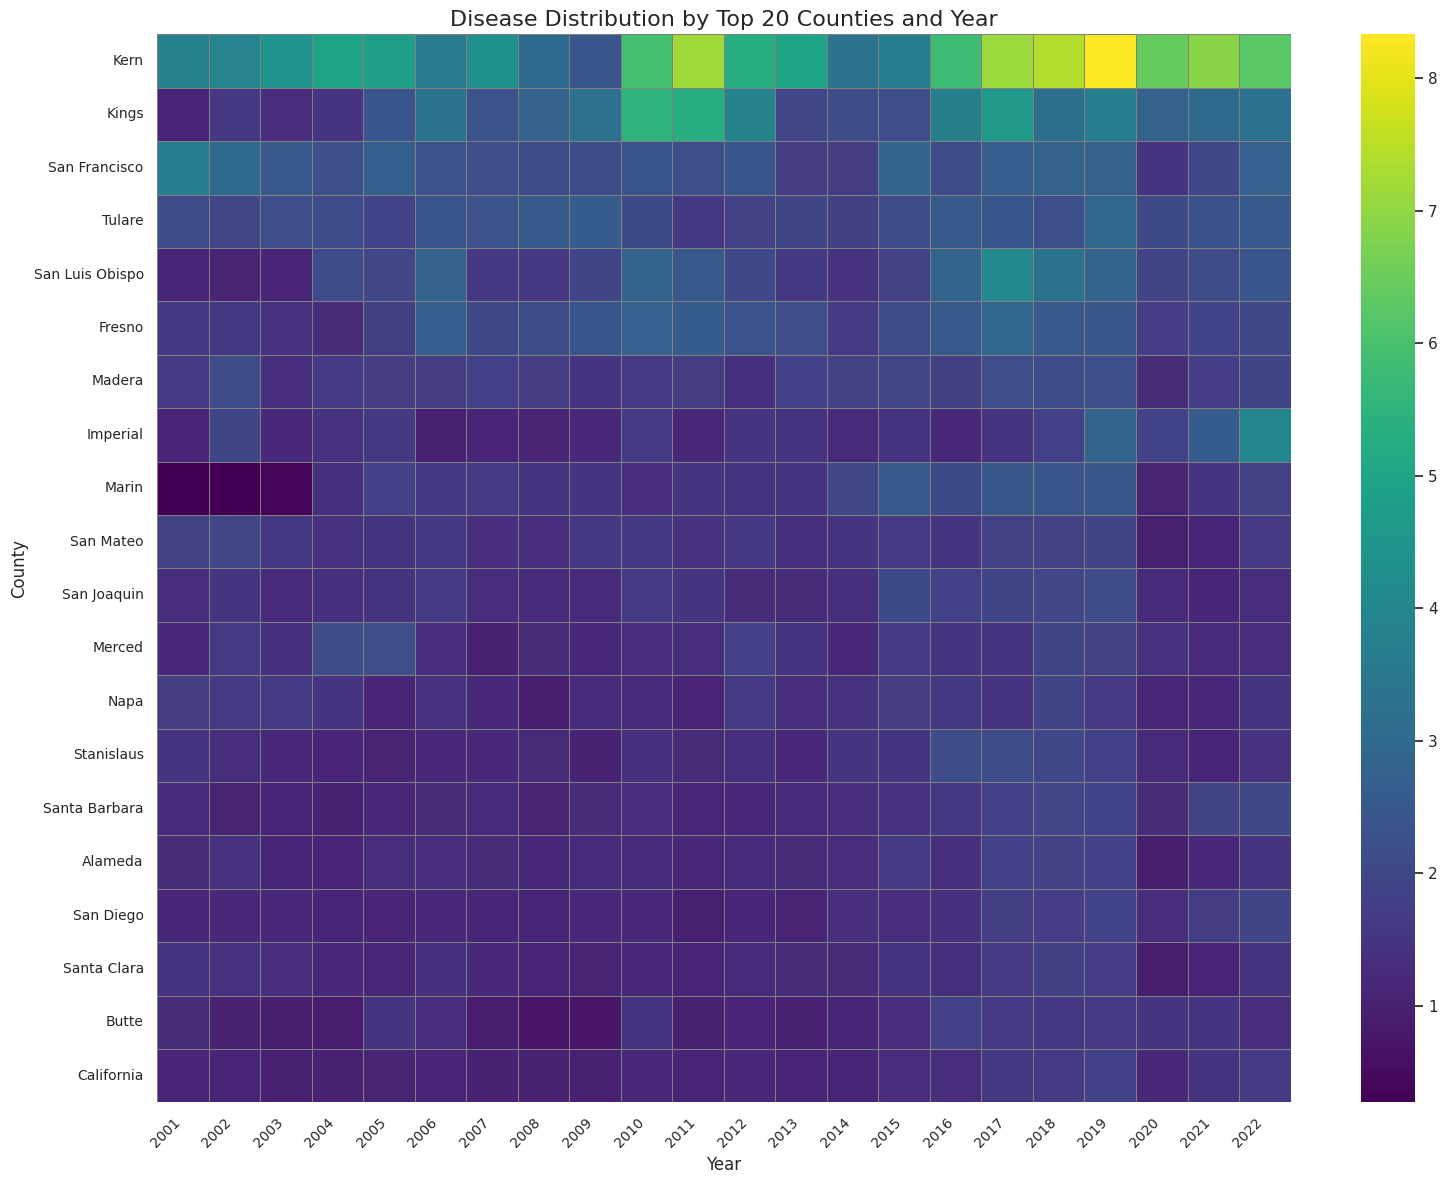

In [33]:
# Group by 'County' and 'Year' to calculate the mean Rate
county_year_df = df.groupby(['County', 'Year'])[['Rate']].mean().reset_index()

# Pivot the table to get Rates by Year and County
county_year_pivot = county_year_df.pivot(columns='Year', index='County', values='Rate')

# Optional: Select top 20 counties based on average rates to reduce density
top_counties = county_year_df.groupby('County')['Rate'].mean().sort_values(ascending=False).head(20).index
county_year_pivot = county_year_pivot.loc[top_counties]

# Heatmap of disease distribution by County and Year with adjustments
plt.figure(figsize=(16, 12))  # Increase figure size for better readability
sns.heatmap(county_year_pivot, cmap='viridis', annot=False, linewidths=0.5, linecolor='gray')

# Adjust title and labels
plt.title('Disease Distribution by Top 20 Counties and Year', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0, fontsize=10)  # Keep y-axis labels horizontal

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything properly
plt.show()

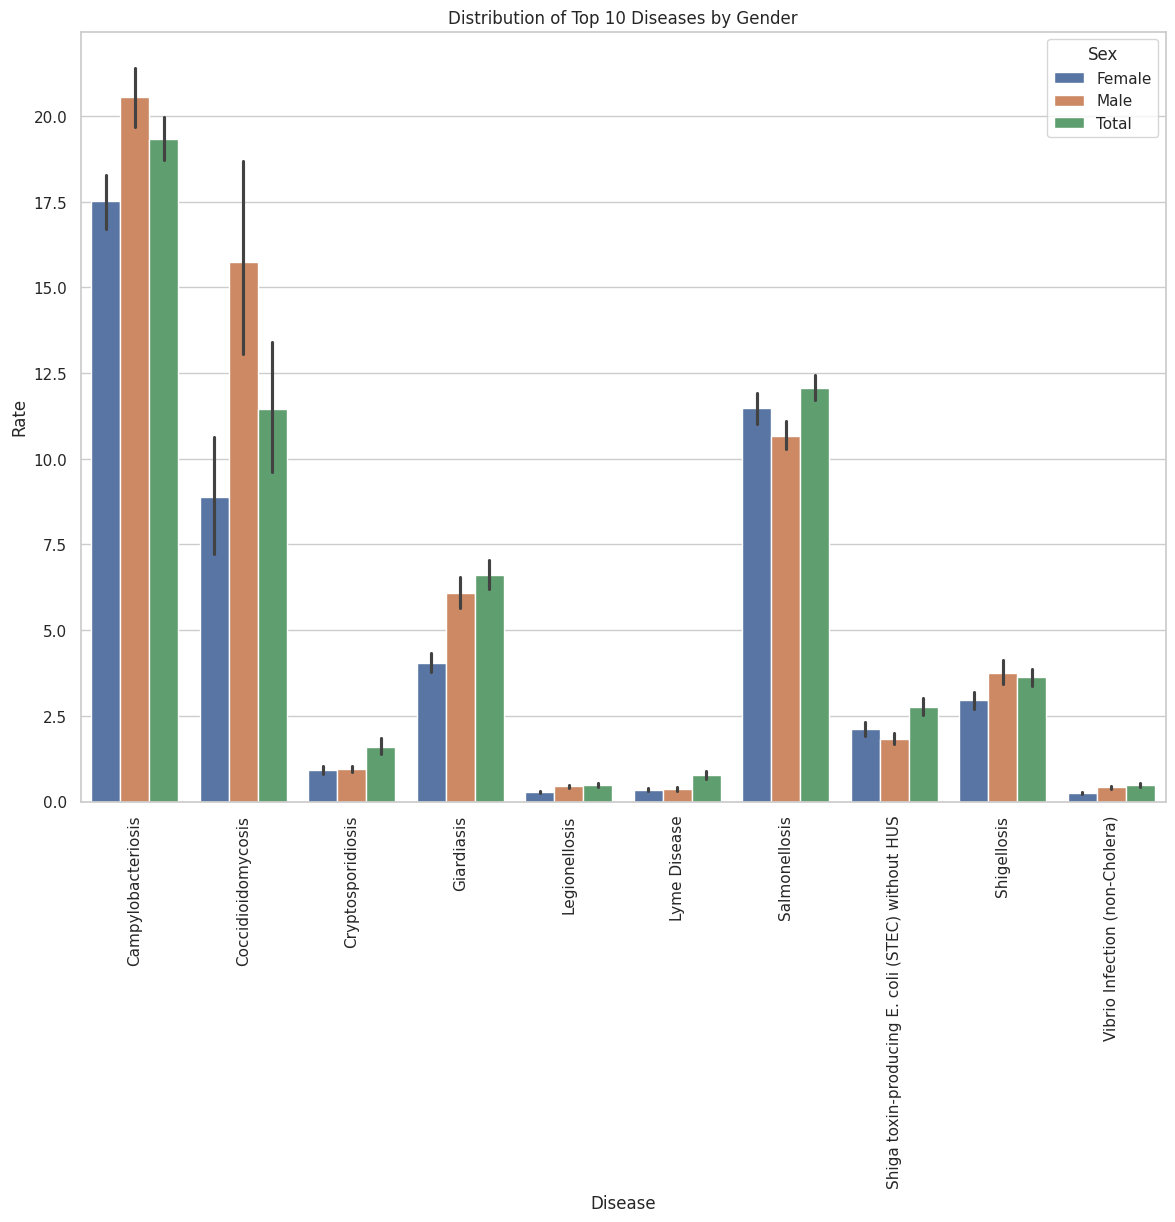

In [34]:
top_10_diseases = df.groupby('Disease')['Rate'].mean().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only the top 10 diseases
top_10_df = df[df['Disease'].isin(top_10_diseases)]

# Create a bar plot of disease incidence by gender
plt.figure(figsize=(14, 10))
sns.barplot(data=top_10_df, x='Disease', y='Rate', hue='Sex')

# Optional: Set the y-scale to logarithmic if needed (uncomment if necessary)
# plt.yscale("log")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the plot title
plt.title('Distribution of Top 10 Diseases by Gender')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/

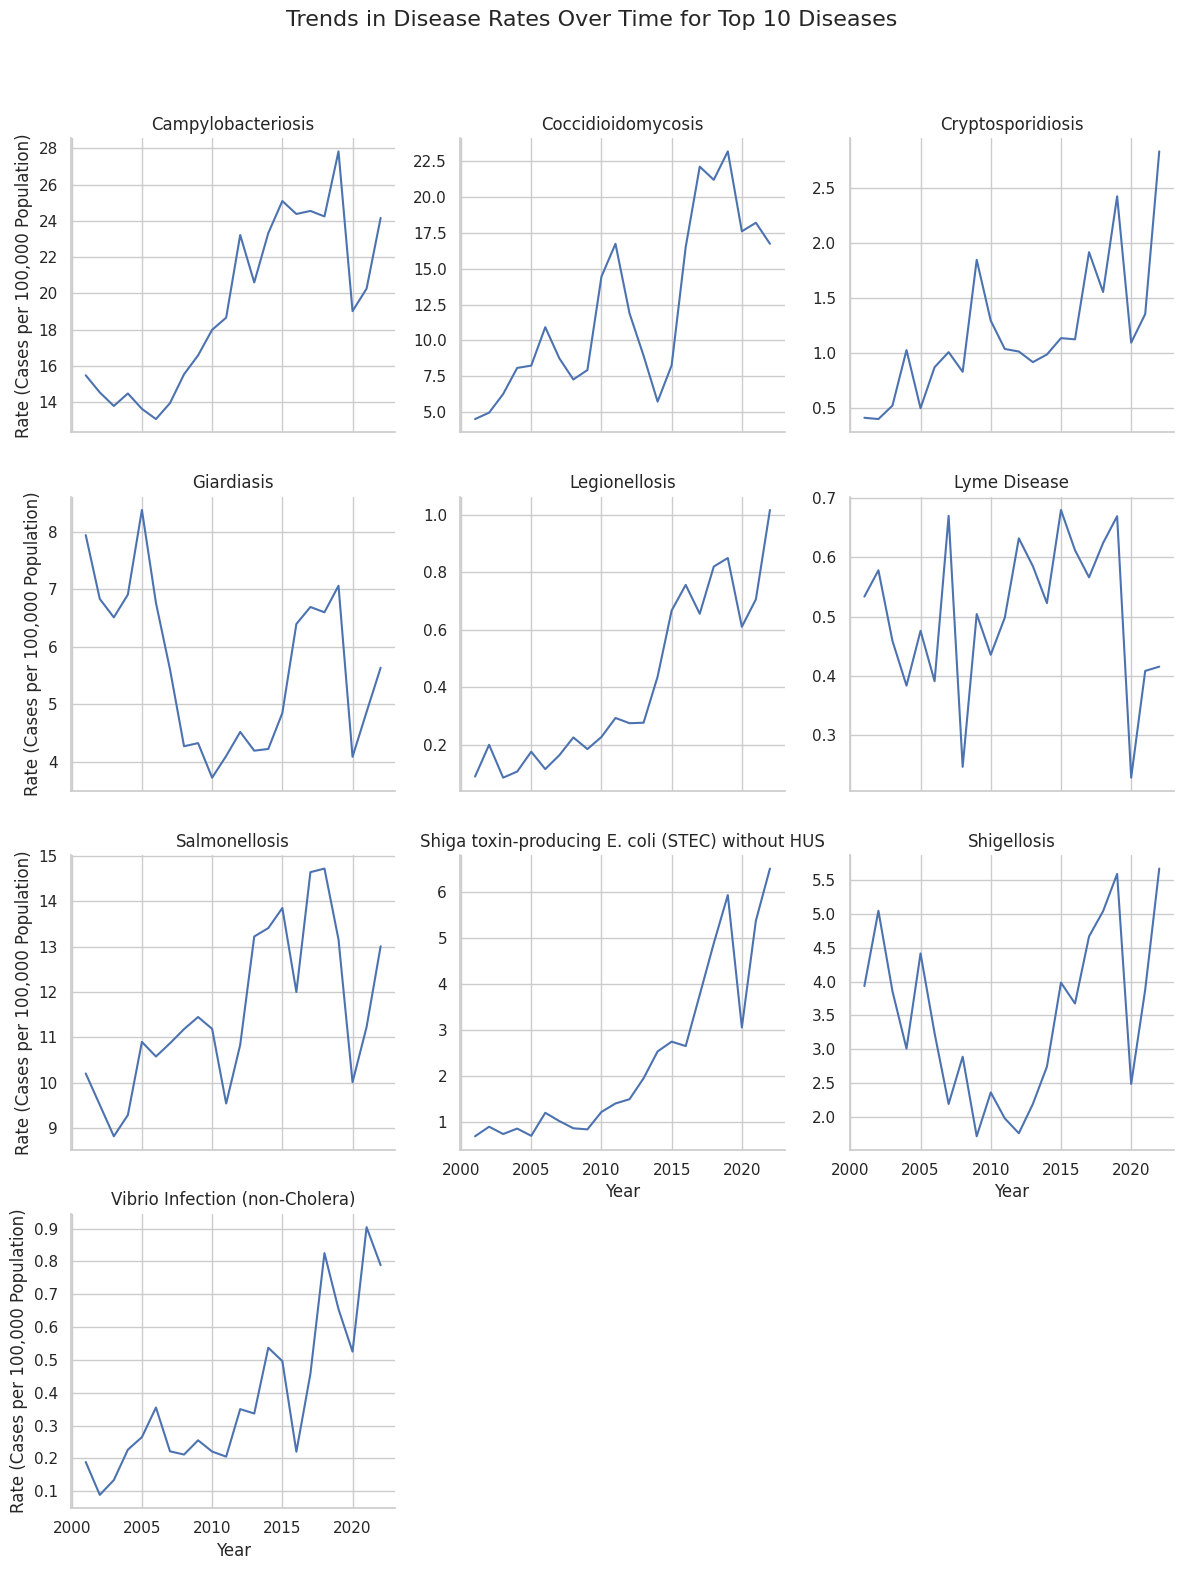

In [35]:
top_10_diseases = df.groupby('Disease')['Rate'].mean().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only the top 10 diseases
top_10_df = df[df['Disease'].isin(top_10_diseases)]

# Create the FacetGrid with the filtered data
g = sns.FacetGrid(top_10_df, col="Disease", col_wrap=3, height=4, sharey=False)

# Map the line plot to each facet
g = g.map(sns.lineplot, "Year", "Rate", ci=None).set_titles("{col_name}")

# Set common axis labels
g.set_axis_labels("Year", "Rate (Cases per 100,000 Population)")

# Adjust the title to be above the plots
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Trends in Disease Rates Over Time for Top 10 Diseases', fontsize=16)

# Show the plot
plt.show()